# <center> Forecast Media Móvil 

In [168]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Data

In [169]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates = ['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


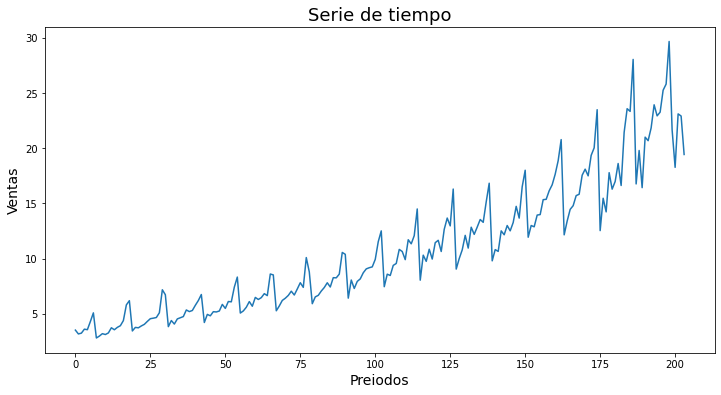

In [170]:
#plotting 
plt.figure(figsize=(12,6))
plt.plot(df.index, df['value'])

plt.xlabel('Preiodos', fontsize = 14)
plt.ylabel('Ventas', fontsize = 14)
plt.title('Serie de tiempo', fontsize = 18)
plt.show()


Notamos que hay una tendencia y estacioalidad por eso es que apriori no sirve de mucho este método de media móvil.

## Manipulando un poco los datos

In [171]:
#data preparations:
# Se le agrega una nueva columa que extraiga sólo los años 
df['year'] = df['date'].apply(lambda x:pd.Timestamp(x).strftime('%Y'))
# Agregamos otra columna para extraer los años y los meses
df['year_month'] = df['date'].apply(lambda x:pd.Timestamp(x).strftime('%Y-%m'))
df

,date,value,year,year_month
0,1991-07-01,3.526591,1991,1991-07
1,1991-08-01,3.180891,1991,1991-08
2,1991-09-01,3.252221,1991,1991-09
3,1991-10-01,3.611003,1991,1991-10
4,1991-11-01,3.565869,1991,1991-11
...,...,...,...,...
199,2008-02-01,21.654285,2008,2008-02
200,2008-03-01,18.264945,2008,2008-03
201,2008-04-01,23.107677,2008,2008-04
202,2008-05-01,22.912510,2008,2008-05


Sólo queremos trabajar con los datos por año y dar un pronostico de las ventas para el próximo 

In [172]:
# Este es un parentisis mio sobre como sólo agregar columnas de año y dia, mes y dia o las combinaciones
#que uno requeiera ya que sería posible requerrir por hora minuto incluso segundo 

df['Day'] = df['date'].apply(lambda x: pd.Timestamp(x).strftime('%d'))
df['Only_Month'] = df['date'].apply(lambda x: pd.Timestamp(x).strftime('%m'))
df

,date,value,year,year_month,Day,Only_Month
0,1991-07-01,3.526591,1991,1991-07,01,07
1,1991-08-01,3.180891,1991,1991-08,01,08
2,1991-09-01,3.252221,1991,1991-09,01,09
3,1991-10-01,3.611003,1991,1991-10,01,10
4,1991-11-01,3.565869,1991,1991-11,01,11
...,...,...,...,...,...,...
199,2008-02-01,21.654285,2008,2008-02,01,02
200,2008-03-01,18.264945,2008,2008-03,01,03
201,2008-04-01,23.107677,2008,2008-04,01,04
202,2008-05-01,22.912510,2008,2008-05,01,05


In [173]:
df.drop(columns= ['Day','Only_Month'] , inplace= True)
df

,date,value,year,year_month
0,1991-07-01,3.526591,1991,1991-07
1,1991-08-01,3.180891,1991,1991-08
2,1991-09-01,3.252221,1991,1991-09
3,1991-10-01,3.611003,1991,1991-10
4,1991-11-01,3.565869,1991,1991-11
...,...,...,...,...
199,2008-02-01,21.654285,2008,2008-02
200,2008-03-01,18.264945,2008,2008-03
201,2008-04-01,23.107677,2008,2008-04
202,2008-05-01,22.912510,2008,2008-05


In [174]:
#Datos Anuales 
annual = df.groupby(by= ['year']).sum().reset_index()
annual

,year,value
0,1991,21.442946
1,1992,45.686946
2,1993,55.532688
3,1994,60.816080
4,1995,67.326599
5,1996,77.397927
6,1997,85.131672
7,1998,93.310626
8,1999,105.959043
9,2000,122.496586


Graficamos de nueva cuenta la serie de tiempo pero esta vez queremos las ventas por año por lo que no tendremos los 244 periodos si no sólo 17 


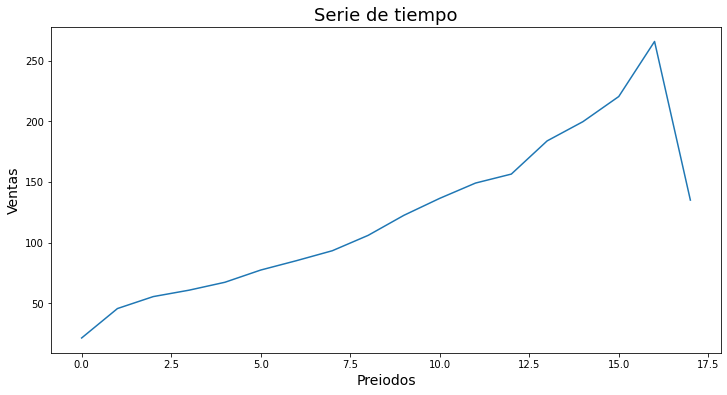

In [175]:
#plotting 
plt.figure(figsize=(12,6))
plt.plot(annual.index, annual['value'])

plt.xlabel('Preiodos', fontsize = 14)
plt.ylabel('Ventas', fontsize = 14)
plt.title('Serie de tiempo', fontsize = 18)
plt.show()

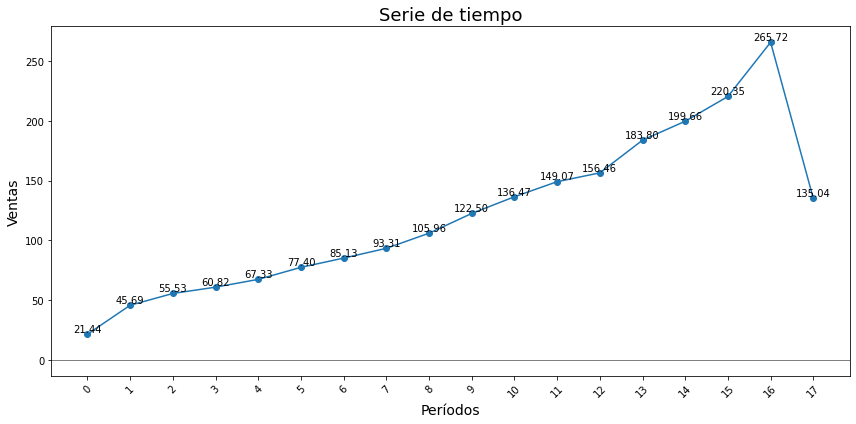

In [176]:
# Supongamos que "annual" es tu DataFrame con los datos de ventas anuales

plt.figure(figsize=(12, 6))
plt.plot(annual.index, annual['value'], marker='o')

plt.xlabel('Períodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Serie de tiempo', fontsize=18)

# Ajustar el eje X para mostrar todos los periodos
plt.xticks(annual.index, annual.index, rotation=45)

# Agregar valores en el eje Y para cada punto
for index, row in annual.iterrows():
    plt.text(index, row['value'], f"{row['value']:.2f}", ha='center', va='bottom')

plt.axhline(y=0, color='black', linewidth=0.5)  # Cruce con el eje X

plt.tight_layout()
plt.show()

## Media Movil | Pandas 

In [177]:
# Promedio Móvil
annual['MA']=annual['value'].rolling(window=3).mean().shift(1)

# Hicimos el shift 4 para que se pueda hacer la media movil de los 3 primeros periodos

annual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


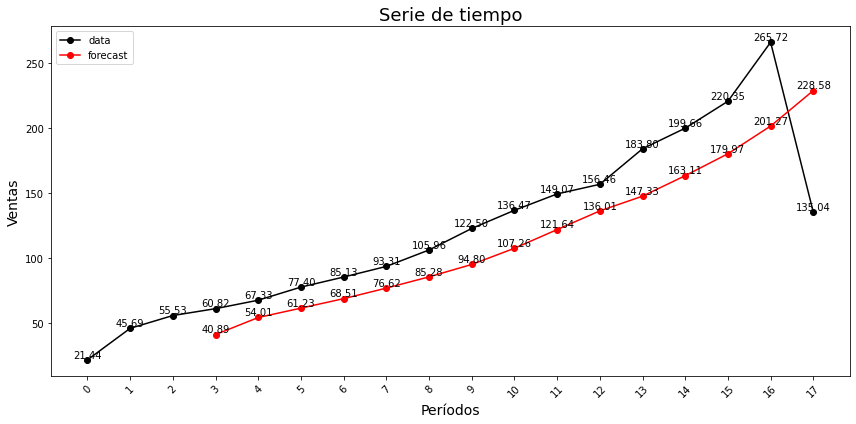

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que "annual" es tu DataFrame con los datos de ventas anuales y forecasts

plt.figure(figsize=(12, 6))
plt.plot(annual.index, annual['value'], marker='o', color='black', label='data')
plt.plot(annual.index, annual['MA'], marker='o', color='red', label='forecast')

plt.xlabel('Períodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Serie de tiempo', fontsize=18)
plt.legend(loc='best')

# Ajustar el eje X para mostrar todos los periodos
plt.xticks(annual.index, annual.index, rotation=45)

# Agregar valores en el eje Y para cada punto en los datos reales
for index, row in annual.iterrows():
    plt.text(index, row['value'], f"{row['value']:.2f}", ha='center', va='bottom')

# Agregar valores en el eje Y para cada punto en el forecast
for index, row in annual.iterrows():
    if not np.isnan(row['MA']):
        plt.text(index, row['MA'], f"{row['MA']:.2f}", ha='center', va='bottom')

plt.tight_layout()

plt.show()


Sólo se han "pronosticado" los valores conocidos y no fueron tan buenos, en el contexto de los modelos de machine learning seria como testear el modelo con los datos de prueba

Veamos como pronosticar para el año siguiente.

In [179]:
# Debemos agregar una nueva fila a nuestro dataset 
# Cada vez que se corra esta celda agregará una nueva fila 

annual.loc[len(annual)]=[int(annual.iloc[len(annual)-1][0])+1,0,0]
annual 

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


In [180]:
annual['MA']=annual['value'].rolling(window=3).mean().shift(1)
annual['year']=annual['year'].astype(int)
annual['value']=annual['value'].astype(float)
annual['MA']=annual['MA'].astype(float)
annual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


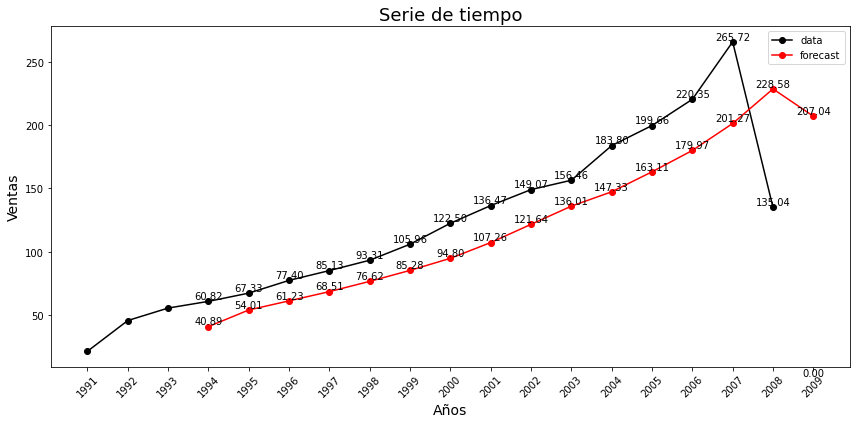

In [182]:
# Supongamos que "annual" es tu DataFrame con los datos de ventas anuales y forecasts

plt.figure(figsize=(12, 6))
plt.plot(annual['year'][:-1], annual['value'][:-1], marker='o', color='black', label='data')
plt.plot(annual['year'], annual['MA'], marker='o', color='red', label='forecast')

plt.xlabel('Años', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Serie de tiempo', fontsize=18)
plt.legend(loc='best')

# Ajustar el eje X para mostrar los años correctamente
plt.xticks(annual['year'], rotation=45)

# Agregar valores en el eje Y para cada punto en los datos reales
for index, row in annual[3:].iterrows():
    plt.text(row['year'], row['value'], f"{row['value']:.2f}", ha='center', va='bottom')

# Agregar valores en el eje Y para cada punto en el forecast
for index, row in annual[3:].iterrows():
    plt.text(row['year'], row['MA'], f"{row['MA']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Ponemos el [:-1] Para que no pronostique con la grave caida que hubo en el 2008 

In [183]:
#Más periodos 

for n in range(3):
    annual.loc[len(annual)] = [int(annual.iloc[len(annual)-1][0])+1,0,0]
    
annual 

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


In [184]:
annual['MA']=annual['value'].rolling(window=3).mean().shift(1)
annual['year']=annual['year'].astype(int)
annual['value']=annual['value'].astype(float)
annual['MA']=annual['MA'].astype(float)
annual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


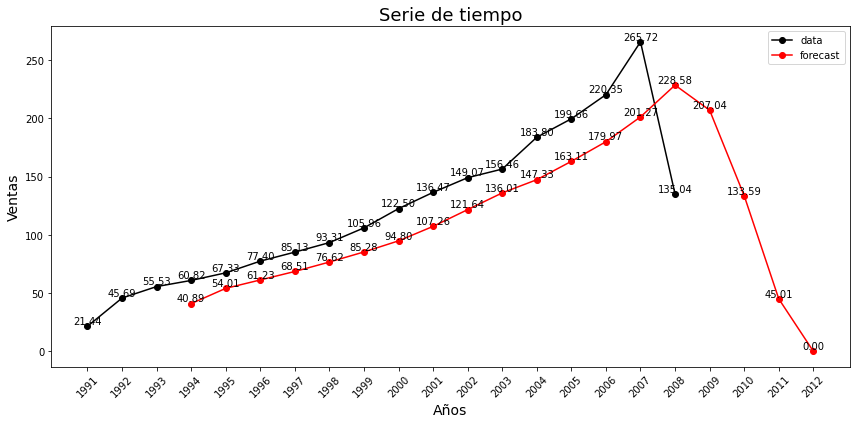

In [188]:
# Supongamos que "annual" es tu DataFrame con los datos de ventas anuales y forecasts

plt.figure(figsize=(12, 6))
plt.plot(annual['year'][:-4], annual['value'][:-4], marker='o', color='black', label='data')
plt.plot(annual['year'], annual['MA'], marker='o', color='red', label='forecast')

plt.xlabel('Años', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Serie de tiempo', fontsize=18)
plt.legend(loc='best')

# Ajustar el eje X para mostrar los años correctamente
plt.xticks(annual['year'], rotation=45)

# Agregar valores en el eje Y para cada punto en los datos reales
for index, row in annual[:-4].iterrows():
    plt.text(row['year'], row['value'], f"{row['value']:.2f}", ha='center', va='bottom')

# Agregar valores en el eje Y para cada punto en el forecast
for index, row in annual[3:].iterrows():
    plt.text(row['year'], row['MA'], f"{row['MA']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Caemos en un problema pues el pronostico va a cero (Seria virtualmente imposible) es el problema de la media movil, en este caso fue de tomar 3 datos anteriores.

In [190]:
import numpy as np

# Supongamos que "annual" es tu DataFrame con los datos de ventas anuales y pronósticos (columnas 'value' y 'MA')

# Calcular el error absoluto para cada año
annual['error'] = np.abs(annual['value'] - annual['MA'])

# Calcular el error medio
mean_error = annual['error'].mean()

print(f"Error medio: {mean_error:.2f}")



Error medio: 45.54


# <center> Suavización Exponencial 

Veamos como usar la suavización exponencial para mejorar el pronostico con respecto a la MEDIA MOVIL ANTERIOR, calcular el error y los pronosticos con este nuevo método.

In [191]:
df

,date,value,year,year_month
0,1991-07-01,3.526591,1991,1991-07
1,1991-08-01,3.180891,1991,1991-08
2,1991-09-01,3.252221,1991,1991-09
3,1991-10-01,3.611003,1991,1991-10
4,1991-11-01,3.565869,1991,1991-11
...,...,...,...,...
199,2008-02-01,21.654285,2008,2008-02
200,2008-03-01,18.264945,2008,2008-03
201,2008-04-01,23.107677,2008,2008-04
202,2008-05-01,22.912510,2008,2008-05
